# Exploratory Data Analysis on Stock Prices % Change around Earnings

## In this notebook, we conduct exploratory data analysis on the features 
### i) percent change in stock price the day before and day after earnings
### ii) percent change in stock price 7 days before and day before earnings
### iii) percent change in stock price 15 days before and 7 days before earnings

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
from pandas.tseries.offsets import BDay
from datetime import datetime, timedelta
import math

from seaborn import set_style
set_style("whitegrid")

import os

from bs4 import BeautifulSoup
import yfinance as yf

In [2]:
file_path = 'C:/Users/spatan5/Desktop/New folder/filtered_data.csv'
data = pd.read_csv(file_path)

In [3]:
data = data[~data['File Name'].str.startswith('FB', na=False)]

In [4]:
data = data[data['Ticker'] != 'ETN']


In [5]:
data.columns

Index(['File Name', 'Ticker', 'Earnings Date and Time',
       'closing_price_next_day', 'closing_price_previous_day',
       'price_7_days_before', 'price_15_days_before', 'perc_change_next_prev',
       'perc_change_prev_7', 'perc_change_7_15'],
      dtype='object')

## The table below shows the biggest percentage changes after earnings from our data set

In [6]:
top_10_perc_change = data.sort_values(by='perc_change_next_prev', ascending=False).head(20).copy()
top_10_perc_change['next_day'] = top_10_perc_change['closing_price_next_day'].round(2)
top_10_perc_change['prev_day'] = top_10_perc_change['closing_price_previous_day'].round(2)
top_10_perc_change['change'] = top_10_perc_change['perc_change_next_prev']
top_10_perc_change[['Ticker', 'Earnings Date and Time',
       'next_day', 'prev_day', 'change', 'price_7_days_before'] ]

,Ticker,Earnings Date and Time,next_day,prev_day,change,price_7_days_before
306,AMD,"April 21, 2016 at 5:00 PM ET",3.99,2.62,52.29,2.810000
2624,NVDA,"November 10, 2016 at 5:00 PM ET",21.64,16.67,29.81,16.988239
1035,CRM,"August 25, 2020 at 5:00 PM ET",271.96,215.77,26.04,193.207626
2607,NVDA,"May 24, 2023 at 5:00 PM ET",379.68,305.28,24.37,289.437164
2263,META,"February 1, 2023 at 5:00 PM ET",188.57,152.96,23.28,143.118149
2668,ORCL,"March 12, 2020 at 5:00 PM ET",44.79,37.20,20.43,45.654179
2264,META,"February 1, 2024 at 4:30 PM ET",474.49,394.36,20.32,384.791748
2501,NFLX,"October 17, 2016 at 5:00 PM ET",118.79,99.80,19.03,105.070000
3336,UBER,"August 2, 2022 at 8:00 AM ET",29.25,24.60,18.90,23.299999
914,CI,"February 5, 2009 at 8:30 AM ET",20.04,16.88,18.70,15.504893


## As expected, NVDA's legendary earnings report from May 2023 (in which they announced increased demand their chips/ data centers because of AI) makes the list, but is not on top


In [7]:
data.shape

(3688, 10)

In [8]:
column_names = data.columns
print(column_names)

Index(['File Name', 'Ticker', 'Earnings Date and Time',
       'closing_price_next_day', 'closing_price_previous_day',
       'price_7_days_before', 'price_15_days_before', 'perc_change_next_prev',
       'perc_change_prev_7', 'perc_change_7_15'],
      dtype='object')


In [9]:
data['Earnings Date and Time'] = pd.to_datetime(data['Earnings Date and Time'], errors='coerce')

# Extract the month from the date
data['Month'] = data['Earnings Date and Time'].dt.month

# Step 3: Group by the extracted month and calculate the average returns
# Assuming there is a column named 'Returns' that contains the return data
# Replace 'Returns' with the actual column name if it's different
average_returns_by_month = data.groupby('Month')['perc_change_next_prev'].mean()

# Print the results
print(average_returns_by_month)

C:\Users\spatan5\AppData\Local\Temp\ipykernel_22700\1303643806.py:1: FutureWarning: Parsed string "January 27, 2015 at 5:00 PM ET" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['Earnings Date and Time'] = pd.to_datetime(data['Earnings Date and Time'], errors='coerce')
C:\Users\spatan5\AppData\Local\Temp\ipykernel_22700\1303643806.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Earnings Date and Time'] = pd.to_datetime(data['Earnings Date and Time'], errors='coerce')
C:\Users\spatan5\AppData\Local\Temp\ipykernel_22700\1303643806.py:1: FutureWarning: Parsed string "January 26, 2016 at 5:00 PM ET" included an un-recognized timezone "ET". Dropping unrecog

Month
1.0     0.031501
2.0     0.490612
3.0     1.067632
4.0     0.040422
5.0     0.198996
6.0     0.723559
7.0     0.529533
8.0     1.051814
9.0    -0.600000
10.0    0.457194
11.0    1.199502
12.0    0.576912
Name: perc_change_next_prev, dtype: float64


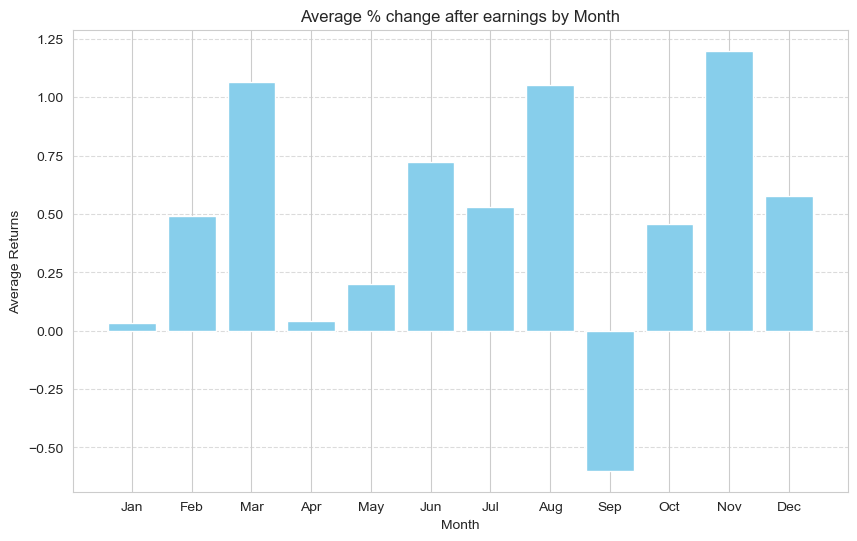

In [10]:
months = range(1, 13)
average_returns = average_returns_by_month

# Plotting the average returns by month
plt.figure(figsize=(10, 6))
plt.bar(months, average_returns, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Returns')
plt.title('Average % change after earnings by Month')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

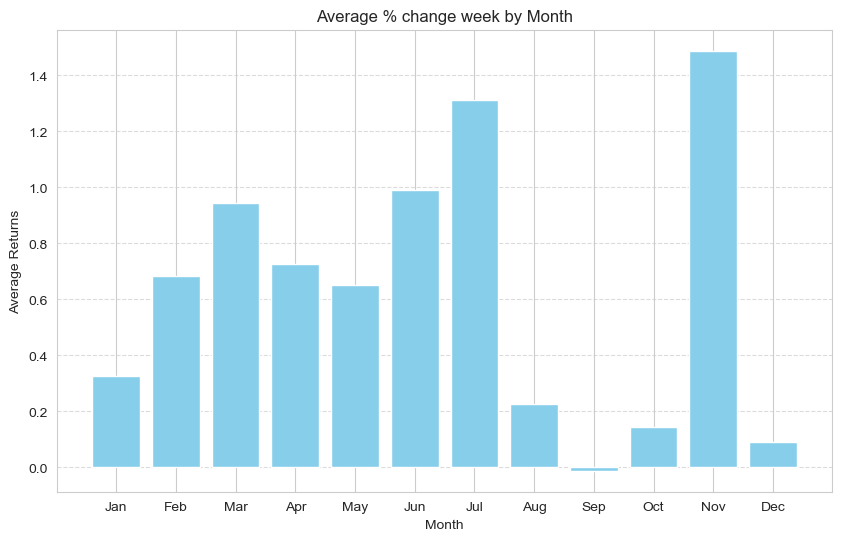

In [11]:
months = range(1, 13)
weekly_returns = data.groupby('Month')['perc_change_prev_7'].mean()

# Plotting the average returns by month
plt.figure(figsize=(10, 6))
plt.bar(months, weekly_returns, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Returns')
plt.title('Average % change week by Month')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# Extract month from the 'Earnings Date and Time' if it's not directly available
# If you have a column directly specifying the month, use that column instead
data['Month'] = pd.to_datetime(data['Earnings Date and Time']).dt.month

# Calculate the average for positive values
positive_averages = data[data['perc_change_next_prev'] > 0].groupby('Month')['perc_change_next_prev'].mean()

# Calculate the average for negative values
negative_averages = data[data['perc_change_next_prev'] < 0].groupby('Month')['perc_change_next_prev'].mean()

# Combine the results into a single DataFrame for easier handling or exporting
averages_by_month = pd.DataFrame({
    'Positive Averages': positive_averages,
    'Negative Averages': negative_averages
}).reset_index()

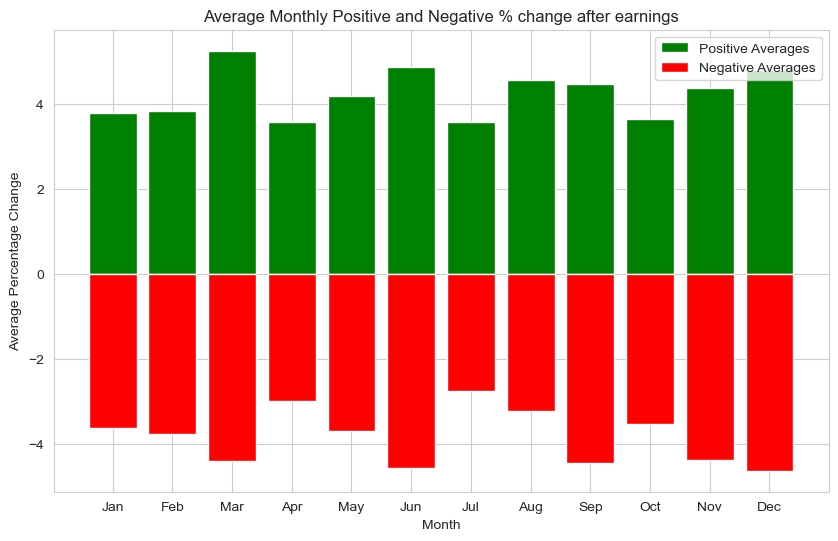

In [13]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Ensure the month names or numbers are properly sorted or arranged if needed
# Here I'm assuming 'Month' is numeric. If it's named (e.g., January, February), you might want to map these to sort correctly.

# Plot positive averages in green
ax.bar(averages_by_month['Month'], averages_by_month['Positive Averages'], color='green', label='Positive Averages')

# Plot negative averages in red
ax.bar(averages_by_month['Month'], averages_by_month['Negative Averages'], color='red', label='Negative Averages')

ax.set_xlabel('Month')
ax.set_ylabel('Average Percentage Change')
ax.set_title('Average Monthly Positive and Negative % change after earnings')
ax.legend()


plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Ensure proper month labels; adjust if using month names
plt.show()

In [14]:
# Extract month from the 'Earnings Date and Time' if it's not directly available
# If you have a column directly specifying the month, use that column instead
data['Month'] = pd.to_datetime(data['Earnings Date and Time']).dt.month

# Calculate the average for positive values
positive_averages = data[data['perc_change_prev_7'] > 0].groupby('Month')['perc_change_prev_7'].mean()

# Calculate the average for negative values
negative_averages = data[data['perc_change_prev_7'] < 0].groupby('Month')['perc_change_prev_7'].mean()

# Combine the results into a single DataFrame for easier handling or exporting
weekly_by_month = pd.DataFrame({
    'Positive Averages': positive_averages,
    'Negative Averages': negative_averages
}).reset_index()

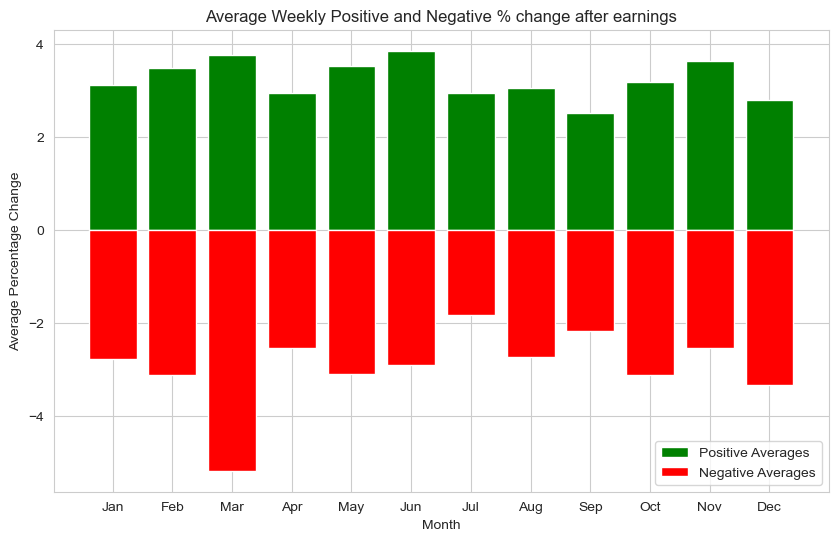

In [15]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Ensure the month names or numbers are properly sorted or arranged if needed
# Here I'm assuming 'Month' is numeric. If it's named (e.g., January, February), you might want to map these to sort correctly.

# Plot positive averages in green
ax.bar(weekly_by_month['Month'], weekly_by_month['Positive Averages'], color='green', label='Positive Averages')

# Plot negative averages in red
ax.bar(weekly_by_month['Month'], weekly_by_month['Negative Averages'], color='red', label='Negative Averages')

ax.set_xlabel('Month')
ax.set_ylabel('Average Percentage Change')
ax.set_title('Average Weekly Positive and Negative % change after earnings')
ax.legend()


plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Ensure proper month labels; adjust if using month names
plt.show()

In [16]:
def square_if_not_nan(i):
    if not math.isnan(i):
        return i * i
    else:
        return 0


In [17]:
res = sum(map(square_if_not_nan, data['perc_change_7_15']))
print(res)

82320.42150000004


In [18]:
variances = data['perc_change_next_prev'].var()
print(variances)

25.539180481544957


In [19]:
variances = data['perc_change_prev_7'].var()
print(variances)

17.357926896172227


In [20]:
variances = data['perc_change_7_15'].var()
print(variances)

21.83312897874854


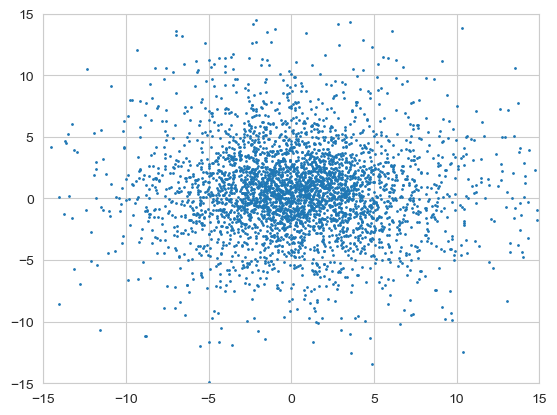

In [21]:
plt.scatter(data['perc_change_next_prev'], data['perc_change_prev_7'], s=1)

plt.xlim(-15, 15)  # Set the limits for the x-axis
plt.ylim(-15, 15)  # Set the limits for the y-axis
plt.show()

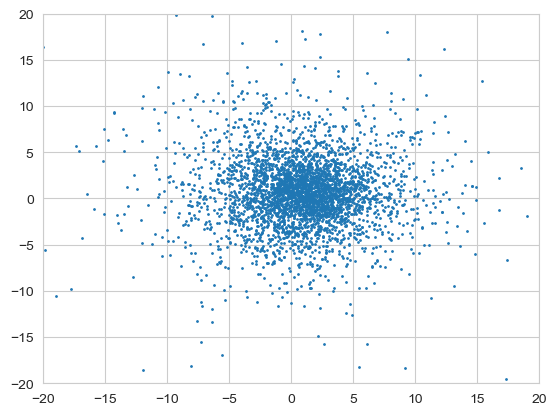

In [22]:
plt.scatter(data['perc_change_7_15'], data['perc_change_prev_7'], s=1)
plt.xlim(-20, 20)  # Set the limits for the x-axis
plt.ylim(-20, 20)  # Set the limits for the y-axis
plt.show()

In [23]:
data.shape

(3688, 11)

In [24]:
data.to_csv("final_%change.csv", index=False)

In [25]:
nan_counts = data.isna().sum(axis=1)

# Filter rows where the count of NaNs is more than 4
rows_with_many_nans = data[nan_counts > 3]

# Print these rows
print(rows_with_many_nans, len(rows_with_many_nans))

       File Name Ticker Earnings Date and Time  closing_price_next_day  \
616   BKNGQ12021   BKNG                    NaT                     NaN   
953    COPQ12020    COP                    NaT                     NaN   
979    COPQ42017    COP                    NaT                     NaN   
1396    FIQ32014   FISV    2014-10-28 17:00:00                     NaN   
2237   MDTQ42014    MDT                    NaT                     NaN   
2361    MSQ42014     MS    2014-01-20 09:30:00                     NaN   
2672  ORCLQ32024   ORCL                    NaT                     NaN   
2699  PANWQ22021   PANW                    NaT                     NaN   
2898   PLDQ42018    PLD                    NaT                     NaN   
3418   UNPQ32014    UNP                    NaT                     NaN   
3428   UNPQ42014    UNP                    NaT                     NaN   

      closing_price_previous_day  price_7_days_before  price_15_days_before  \
616                          NaN

In [26]:
data.sample(10)

,File Name,Ticker,Earnings Date and Time,closing_price_next_day,closing_price_previous_day,price_7_days_before,price_15_days_before,perc_change_next_prev,perc_change_prev_7,perc_change_7_15,Month
982,COPQ42020,COP,2021-02-02 12:00:00,36.137238,35.907890,37.654343,41.826397,0.64,-4.64,-9.97,2.0
1831,JPMQ12011,JPM,2011-04-13 09:00:00,32.168926,32.440193,32.231522,31.545742,-0.84,0.65,2.17,4.0
479,AVGOQ22023,AVGO,2023-06-01 17:00:00,796.253784,774.631348,673.187439,615.498230,2.79,15.07,9.37,6.0
3441,UPSQ12017,UPS,2017-04-27 08:30:00,86.812370,85.847183,83.039299,85.089348,1.12,3.38,-2.41,4.0
380,AMTQ12016,AMT,2016-04-29 08:30:00,87.486923,86.861290,87.436874,88.179260,0.72,-0.66,-0.84,4.0
615,BKNGQ12020,BKNG,2020-05-07 16:30:00,1427.177734,1440.224487,1435.646118,1403.807617,-0.91,0.32,2.27,5.0
877,CIQ12011,CI,2011-05-05 08:30:00,44.424488,43.238087,42.842606,41.740940,2.74,0.92,2.64,5.0
2815,PGQ42021,PG,2021-07-30 08:30:00,133.670502,131.086029,130.005219,127.978577,1.97,0.83,1.58,7.0
2609,NVDAQ22015,NVDA,2014-08-07 17:00:00,4.522075,4.155548,4.231711,4.593476,8.82,-1.80,-7.88,8.0
3479,VQ12015,V,2015-01-29 17:00:00,59.762745,58.142727,60.215225,61.999371,2.79,-3.44,-2.88,1.0


In [27]:
def rearrange_filename(filename):
    # Extract parts assuming format is ticker + 'Q' + quarter + year (e.g., ORCLQ22017)
    ticker = filename[:-6]  # Get everything except the last 5 characters
    year = filename[-4:]    # Last 4 characters are the year
    quarter = filename[-5:-4]  # The fifth last character is the quarter number

    # Create new format: ticker + year + Q + quarter
    new_filename = f"{ticker}{year}Q{quarter}"
    return new_filename

# Apply the function to the 'filename' column
data['File Name'] = data['File Name'].apply(rearrange_filename)

# Optionally, save the modified DataFrame back to a CSV or use it further
# df.to_csv('/mnt/data/modified_data.csv', index=False)

In [28]:
data.to_csv("final_percent_changes.csv", index=False)

In [29]:
data.sample(10)


,File Name,Ticker,Earnings Date and Time,closing_price_next_day,closing_price_previous_day,price_7_days_before,price_15_days_before,perc_change_next_prev,perc_change_prev_7,perc_change_7_15,Month
1475,GILD2023Q2,GILD,2023-08-03 17:00:00,76.430496,73.370552,75.021957,74.516815,4.17,-2.20,0.68,8.0
1182,CVX2023Q4,CVX,2024-02-02 11:00:00,150.596725,146.293671,143.355728,145.680374,2.94,2.05,-1.60,2.0
3457,UPS2022Q2,UPS,2022-07-26 08:30:00,169.779236,175.746246,170.770645,172.678574,-3.40,2.91,-1.10,7.0
1649,IBM2022Q1,IBM,2022-04-19 17:00:00,125.913185,117.565689,116.273056,120.105438,7.10,1.11,-3.19,4.0
3543,VRTX2018Q3,VRTX,2018-10-24 16:30:00,165.610001,163.089996,177.649994,192.210007,1.55,-8.20,-7.58,10.0
8,AAPL2023Q1,AAPL,2023-02-02 17:00:00,153.445419,149.790558,141.557114,132.499374,2.44,5.82,6.84,2.0
2806,PG2022Q3,PG,2022-04-20 08:30:00,155.590469,151.559311,151.635391,146.786514,2.66,-0.05,3.30,4.0
664,BLK2022Q3,BLK,2022-10-13 08:30:00,543.031006,509.520264,567.274170,576.100464,6.58,-10.18,-1.53,10.0
107,ABT2023Q4,ABT,2024-01-24 09:00:00,110.223351,113.437416,113.357803,108.455582,-2.83,0.07,4.52,1.0
3502,V2017Q3,V,2017-07-20 17:00:00,95.123581,93.700508,91.121902,90.176346,1.52,2.83,1.05,7.0


In [30]:
# Extract the company ticker from the 'File Name' by capturing the text before 'Q' followed by a digit
data['Company'] = data['File Name'].str.extract(r'([A-Z]+)')

# Calculate the variance of 'perc_change_next_prev' for each company
variance_data = data.groupby('Company')['perc_change_next_prev'].var()
variance_data.head(15)

# Find the company with the greatest variance
company_greatest_variance = variance_data.idxmax()
greatest_variance = variance_data.max()

# Print the results
print("Company with the greatest variance:", company_greatest_variance)
print("Variance:", greatest_variance)

Company with the greatest variance: AMD
Variance: 167.46983394957982


In [31]:
sorted_variance = variance_data.sort_values(ascending=True)

In [32]:
sorted_variance.tail(10)

Company
MU       53.299281
AMZN     60.923533
UBER     62.417869
TSLA     72.328618
NVDA     75.892927
PANW    113.197474
META    132.577438
NFLX    139.075842
AMD     167.469834
I              NaN
Name: perc_change_next_prev, dtype: float64

(-15.0, 15.0)

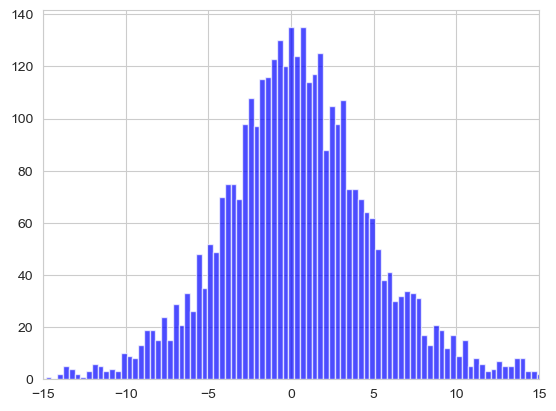

In [33]:
plt.hist(data['perc_change_next_prev'], bins = 250, color = 'blue', alpha = 0.7)
plt.xlim(-15, 15)